In [110]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [111]:
df = pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Text(0, 0.5, 'Charges')

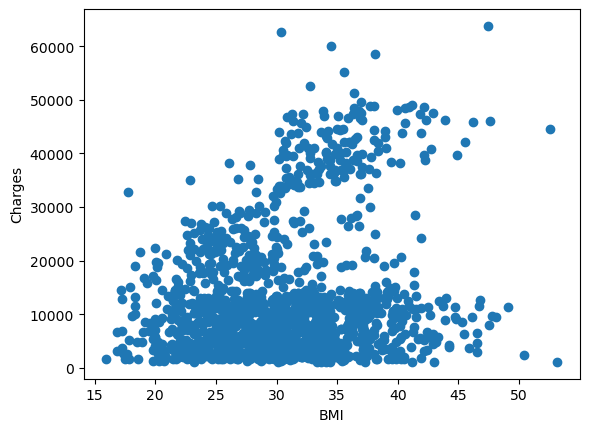

In [112]:
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')

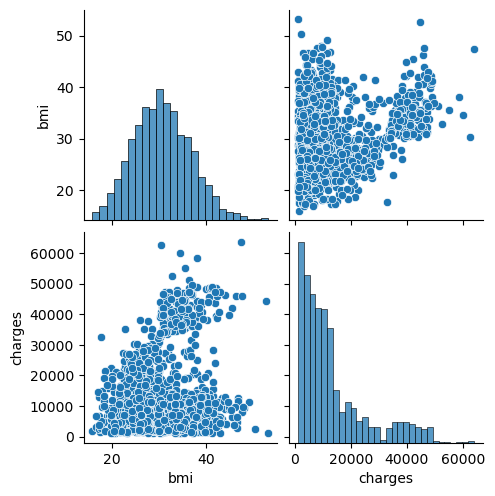

In [113]:
sn.pairplot(df[['bmi', 'charges']])

In [114]:
# Encode categorical features
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [115]:
# Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['age', 'bmi', 'children']])
df[['age', 'bmi', 'children']] = scaled_features

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 57.6 KB


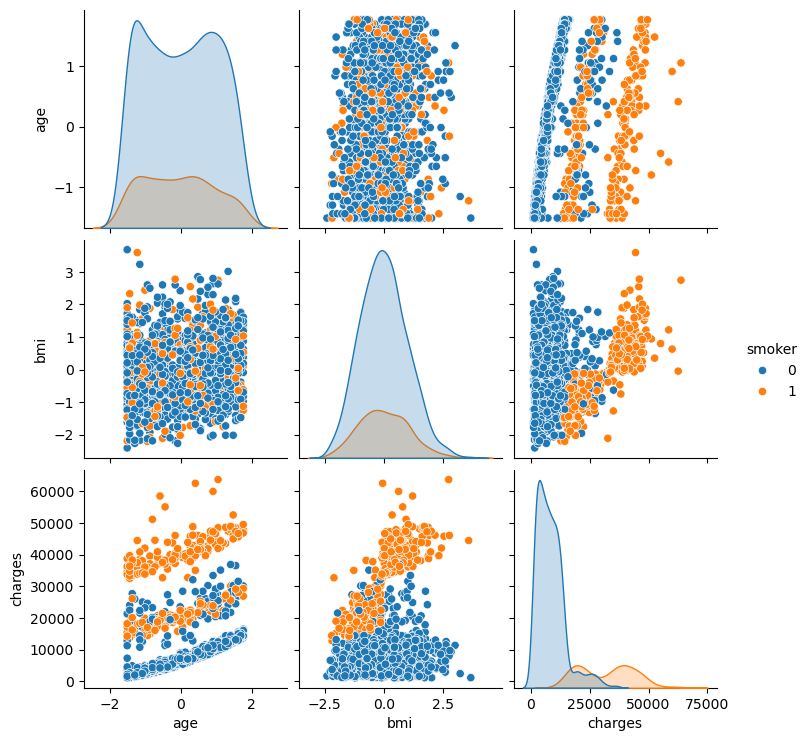

In [138]:
sn.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker')
plt.show()

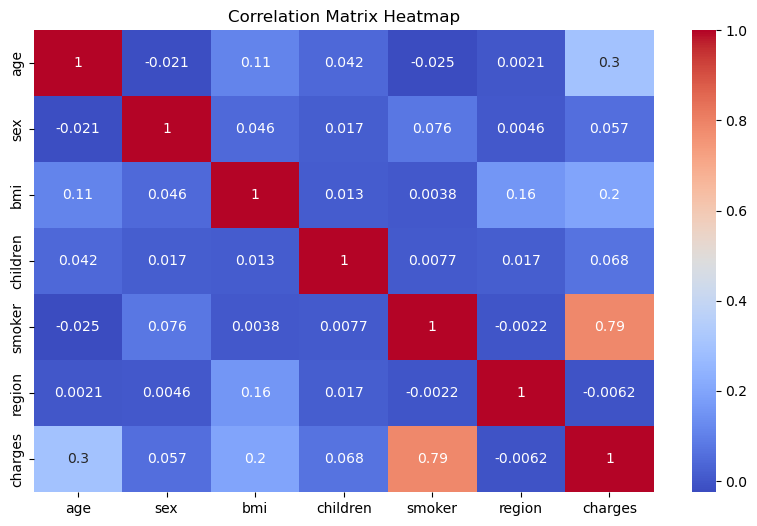

In [118]:
plt.figure(figsize=(10, 6))
sn.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

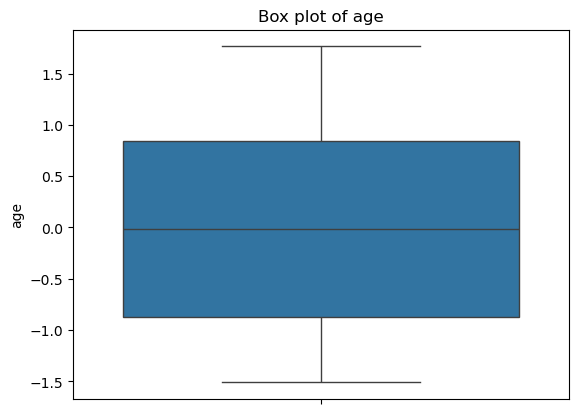

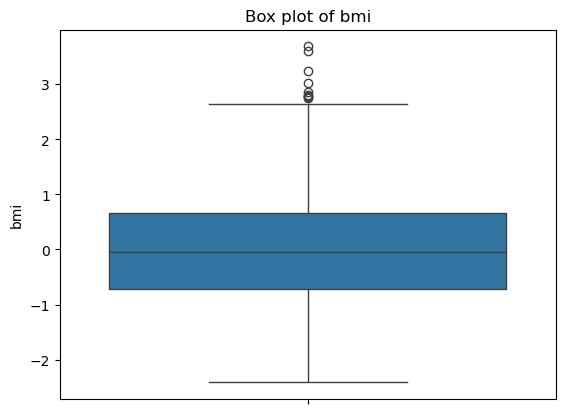

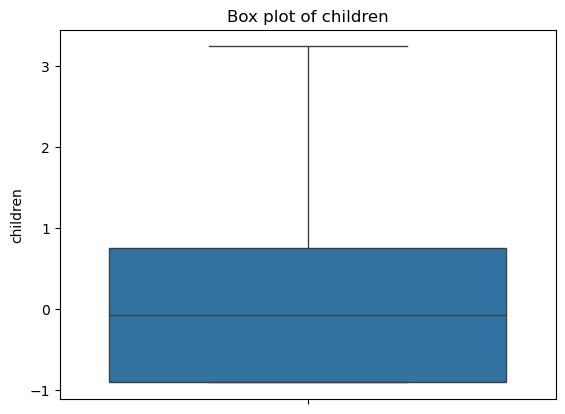

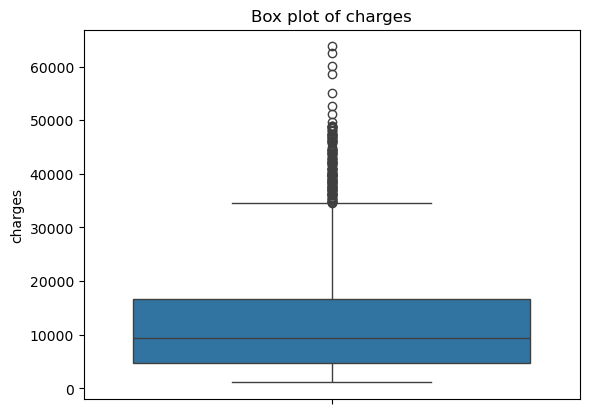

In [119]:
for col in ['age', 'bmi', 'children', 'charges']:
    plt.figure()
    sns.boxplot(data=df, y=col)
    plt.title(f"Box plot of {col}")
    plt.show()

<Axes: xlabel='region', ylabel='count'>

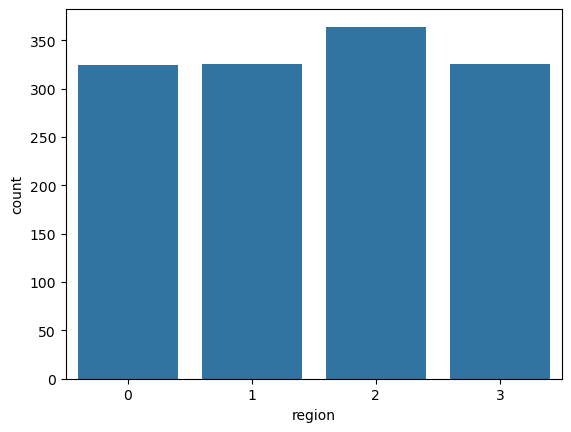

In [139]:

#add count plot
sns.countplot(x='region', data=df)

In [120]:
# Feature scaling for all features (important for SVR)
scaler = StandardScaler()
X = df.drop('charges', axis=1)
X = scaler.fit_transform(X)

y = df['charges']
y = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten() 

In [97]:
X = df.drop('charges', axis=1)
y = df['charges']

In [122]:
# Create Train and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [140]:
#Decision Treet Modelling
from sklearn.tree import DecisionTreeRegressor

modelTree = DecisionTreeRegressor().fit(X_train, y_train)
y_predDT = modelTree.predict(X_test) 
scoreDT = modelTree.score(X_test, y_test)

print(scoreDT)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7361156127611073
0.14407556204184235
0.20746756618148024


### Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train, y_train)
y_predRF = RF.predict(X_test) 
scoreRF = RF.score(X_test, y_test)
print(scoreRF)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8745309990319485
0.14407556204184235
0.20746756618148024


### SVR Model

In [129]:
# Train SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=100)

In [142]:
y_predSVR = svr.predict(X_test) 
scoreSVR = svr.score(X_test, y_test)
print(f"R2: {scoreSVR}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R2: 0.8564131158930324
MSE: 0.14407556204184235
MAE: 0.20746756618148024


#### Ranndom Forest is the best model giving it has the highest R2 of 87% with the lowest MSE of 14%.

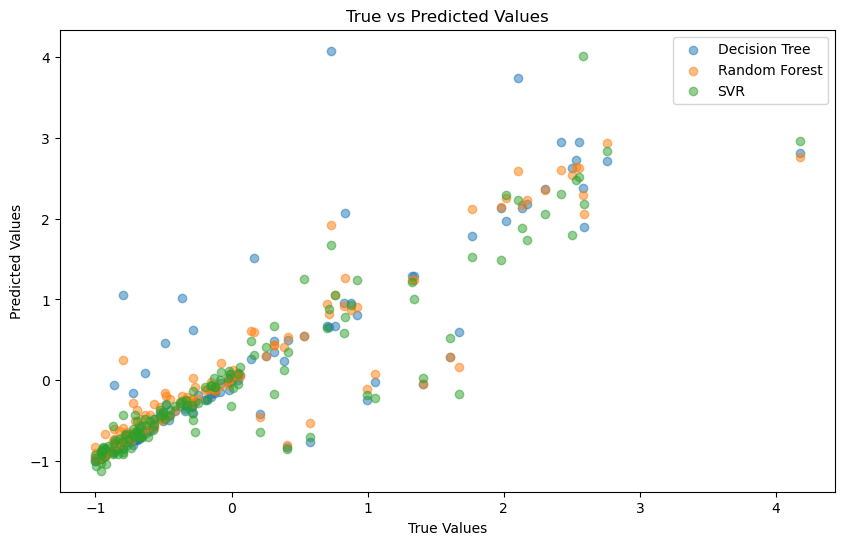

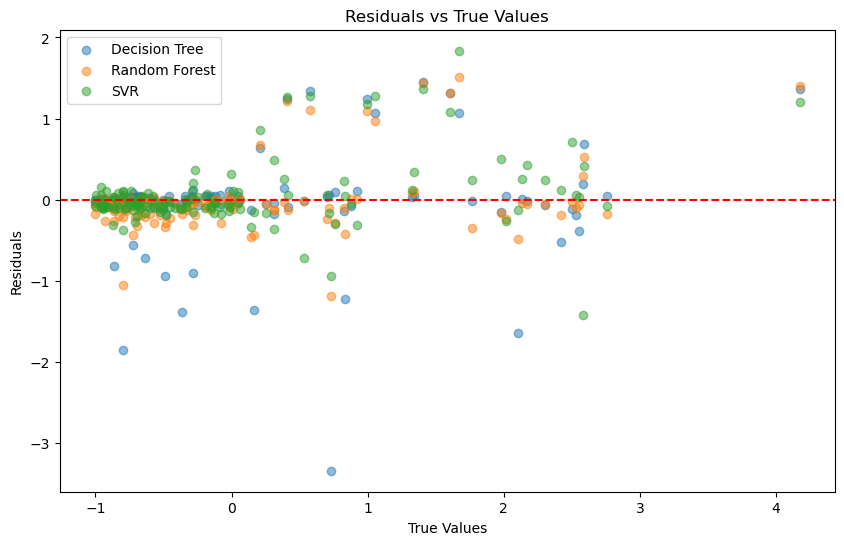

In [145]:
#use scatter plot to visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predDT, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_predRF, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_predSVR, label='SVR', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

#plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_predDT, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_test - y_predRF, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_test - y_predSVR, label='SVR', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')
plt.legend()
plt.show()